<a href="https://colab.research.google.com/github/IKAR42/SberDS_Study/blob/main/HW_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('drive/My Drive/Colab Notebooks/winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
x = data.drop('quality',axis=1)
y = data['quality']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1119, 11), (480, 11), (1119,), (480,))

2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [8]:
# DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(x_train, y_train)
tree_y_pred = tree_classifier.predict(x_test)
 
acc_tree =cross_val_score(tree_classifier, x_train, y_train, cv=5, scoring='accuracy')
acc_DT = acc_tree.mean()
print('acc_DT:' ,round(acc_DT, 2))

# BaggingClassifier

bag_classifier = BaggingClassifier(n_estimators=100, random_state=42)
bag_classifier.fit(x_train, y_train)
bag_y_pred = bag_classifier.predict(x_test)

acc_bag =cross_val_score(bag_classifier, x_train, y_train, cv=5, scoring='accuracy')
acc_Bagging = acc_bag.mean()
print('acc_Bagging:' ,round(acc_Bagging, 2))

# RandomForestClassifier

Random_f = RandomForestClassifier(n_estimators=100, random_state=42)
Random_f.fit(x_train, y_train)
rf_y_pred = Random_f.predict(x_test)

acc_rf_1 =cross_val_score(Random_f, x_train, y_train, cv=5, scoring='accuracy')
acc_RF = acc_rf_1.mean()
print('acc_RF:' ,round(acc_RF, 2))


#acc_DT = 0
#acc_Bagging = 0
#acc_RF = 0
results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]

acc_DT: 0.59
acc_Bagging: 0.67
acc_RF: 0.68


* Наилучшим результатом отличились алгоритмы, в которых мы задавали настраиваемые параметры 
* Важно при выборе модели задействовать и ее внутренние параметры и их тюнить
* Самым лучшим алгоритмом в этом эксперименте является случайный лес 

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.

In [ ]:
НАДО СДЕЛАТЬ !!!!!

In [155]:
import matplotlib.pyplot as plt
from pylab import rcParams

In [125]:
g = [i for i in range (200, 5200) if i % 200 == 0]

In [126]:
estimators = [10, 50, 100] + g
estimators

[10,
 50,
 100,
 200,
 400,
 600,
 800,
 1000,
 1200,
 1400,
 1600,
 1800,
 2000,
 2200,
 2400,
 2600,
 2800,
 3000,
 3200,
 3400,
 3600,
 3800,
 4000,
 4200,
 4400,
 4600,
 4800,
 5000]

In [149]:
scores =[]
for k in estimators:
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

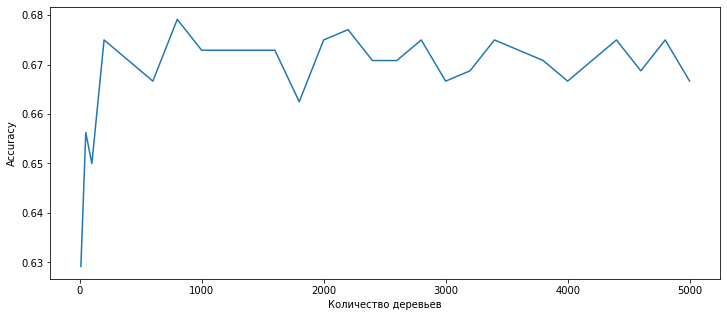

In [160]:
rcParams['figure.figsize'] = 12,5
plt.plot(estimators, scores)
plt.xlabel('Количество деревьев')
plt.ylabel('Accuracy')
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [10]:
# GradientBoostingClassifier / sklearn

GBC = GradientBoostingClassifier(random_state=42).fit(x_train, y_train)
y_pred_gbc = GBC.predict(x_test)

acc_GBC = cross_val_score(GBC, x_train, y_train, cv=5, scoring='accuracy')
acc_sklearn = acc_GBC.mean()
print('acc_sklearn:' ,round(acc_sklearn, 2))

# xgboost

XGB_model = XGBClassifier(random_state=42).fit(x_train, y_train)
y_pred_xgb = XGB_model.predict(x_test)

acc_XGB = cross_val_score(XGB_model, x_train, y_train, cv=5, scoring='accuracy')
acc_xgboost = acc_XGB.mean()
print('acc_xgboost:' ,round(acc_xgboost, 2))

#acc_sklearn = 0
#acc_xgboost = 0
results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]

acc_sklearn: 0.64
acc_xgboost: 0.63


5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [11]:
# параметры для GradientBoostingClassifier

parameters_sklearn = {
              'max_depth': [15, 25, 35],
              'learning_rate': [0.01, 0.02, 0.05],
              'n_estimators': [50, 100, 150],
}

In [14]:
%%time
GS_GB = GridSearchCV(GBC, param_grid=parameters_sklearn, cv=3)
GS_GB.fit(x_train, y_train)

CPU times: user 11min 43s, sys: 1.49 s, total: 11min 45s
Wall time: 11min 57s


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.02, 0.05],
                         'max_depth': [15, 25, 35],
                         'n_estimators': [50, 100, 150]})

In [15]:
best_params_sklearn = GS_GB.best_params_
best_params_sklearn

{'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 100}

In [16]:
%%time
GBC_GS = GradientBoostingClassifier(max_depth=15, learning_rate=0.01, n_estimators=100 , random_state=42).fit(x_train, y_train)
y_pred_gbc_gs = GBC_GS.predict(x_test)

acc_GBC_GS = cross_val_score(GBC_GS, x_train, y_train, cv=3, scoring='accuracy')
acc_sklearn_cv = acc_GBC.mean()
print('acc_sklearn_cv:' ,round(acc_sklearn_cv, 2))

acc_sklearn_cv: 0.64
CPU times: user 42.7 s, sys: 153 ms, total: 42.9 s
Wall time: 44.5 s


In [17]:
# параметры для Xgboost

parameters_xgb = {
              'max_depth': [15, 25, 35],
              'learning_rate': [0.01, 0.02, 0.05],
              'n_estimators': [50, 100, 150],
}

In [18]:
%%time
GS_XG = GridSearchCV(XGB_model, param_grid=parameters_xgb, cv=3)
GS_XG.fit(x_train, y_train)

CPU times: user 1min 25s, sys: 1.29 s, total: 1min 26s
Wall time: 1min 27s


GridSearchCV(cv=3,
             estimator=XGBClassifier(objective='multi:softprob',
                                     random_state=42),
             param_grid={'learning_rate': [0.01, 0.02, 0.05],
                         'max_depth': [15, 25, 35],
                         'n_estimators': [50, 100, 150]})

In [19]:
best_params_xgboost = GS_XG.best_params_
best_params_xgboost

{'learning_rate': 0.02, 'max_depth': 15, 'n_estimators': 150}

In [20]:
%%time
XGB_model_GS = XGBClassifier(learning_rate=0.02, max_depth=15, n_estimators=150, random_state=42).fit(x_train, y_train)
y_pred_xgb_gs = XGB_model_GS.predict(x_test)

acc_XGB_GS = cross_val_score(XGB_model_GS, x_train, y_train, cv=3, scoring='accuracy')
acc_xgboost_cv = acc_XGB_GS.mean()
print('acc_xgboost_cv:' ,round(acc_xgboost_cv, 2))

acc_xgboost_cv: 0.63
CPU times: user 7.85 s, sys: 121 ms, total: 7.97 s
Wall time: 8.08 s


In [21]:
#best_params_sklearn = {}
print('Параметры лучшей модели sklearn:\n', best_params_sklearn)
#best_params_xgboost = {}
print('Параметры лучшей модели xgboost:\n', best_params_xgboost)
#acc_sklearn_cv = 0
#acc_xgboost_cv = 0
results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', acc_sklearn_cv]
results.loc[6] = ['XGBClassifier_CV', 'task5', acc_xgboost_cv]

Параметры лучшей модели sklearn:
 {'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 100}
Параметры лучшей модели xgboost:
 {'learning_rate': 0.02, 'max_depth': 15, 'n_estimators': 150}


6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [22]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.1 MB/s eta 0:00:00


In [23]:
import lightgbm as lgb
from catboost import CatBoostClassifier

In [ ]:
# catboost

cat_boo = CatBoostClassifier(random_state=42).fit(x_train, y_train)
y_pred_cat_b = cat_boo.predict(x_test)
acc_CBoo = cross_val_score(cat_boo, x_train, y_train, cv=5, scoring='accuracy')
acc_catboost = acc_CBoo.mean()

In [25]:
# lightgbm

light_gbm = lgb.LGBMClassifier().fit(x_train, y_train)
y_pred_gbm = light_gbm.predict(x_test)

acc_GBM = cross_val_score(light_gbm, x_train, y_train, cv=5, scoring='accuracy')
acc_lightgbm = acc_GBM.mean()

print('acc_sklearn:' ,round(acc_sklearn, 2))
print('acc_xgboost:' ,round(acc_xgboost, 2))

print('acc_lightgbm:' ,round(acc_lightgbm, 2))
print('acc_catboost:' ,round(acc_catboost, 2))

#acc_lightgbm = 0
#acc_catboost = 0
results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost]

acc_sklearn: 0.64
acc_xgboost: 0.63
acc_lightgbm: 0.66
acc_catboost: 0.66


7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [13]:
from sklearn.model_selection import GridSearchCV

In [27]:
# Lightgbm

parameters_light = {
              'max_depth': [15, 25, 35],
              'learning_rate': [0.01, 0.02, 0.05],
              'n_estimators': [50, 100, 150],
}

In [28]:
%%time
# модель взял из задания выше - light_gbm

gsearch_light = GridSearchCV(light_gbm, param_grid=parameters_light, cv=3)
gsearch_light.fit(x_train, y_train)

CPU times: user 39.8 s, sys: 2.18 s, total: 42 s
Wall time: 42.3 s


GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.02, 0.05],
                         'max_depth': [15, 25, 35],
                         'n_estimators': [50, 100, 150]})

In [29]:
best_params_lightgbm = gsearch_light.best_params_
best_params_lightgbm

{'learning_rate': 0.05, 'max_depth': 25, 'n_estimators': 100}

In [30]:
%%time
light_gbm_gs = lgb.LGBMClassifier(max_depth= 25, learning_rate= 0.05, n_estimators=100, random_state=42).fit(x_train, y_train)
y_pred_lgbm_gs = light_gbm_gs.predict(x_test)

acc_light_GS = cross_val_score(light_gbm_gs, x_train, y_train, cv=3, scoring='accuracy')
acc_lightgbm_cv = acc_light_GS.mean()
print('acc_lightgbm_cv:' ,round(acc_lightgbm_cv, 2))

acc_lightgbm_cv: 0.62
CPU times: user 1.94 s, sys: 101 ms, total: 2.04 s
Wall time: 2.06 s


In [34]:
# Catboost

parameters_cat = {
              'max_depth': [15, 25, 35],
              'learning_rate': [0.01, 0.02, 0.05],
              'n_estimators': [10, 20, 30],
}

In [ ]:
%%time
gsearch_xgbm = GridSearchCV(cat_boo, param_grid=parameters_cat, cv=3)
gsearch_xgbm.fit(x_train, y_train)

In [36]:
best_params_catboost = gsearch_xgbm.best_params_
best_params_catboost

{'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 10}

In [ ]:
%%time
cat_boo_gs = CatBoostClassifier(max_depth= 15, learning_rate= 0.05, n_estimators= 10, random_state=42).fit(x_train, y_train)
y_pred_cat_gs = cat_boo_gs.predict(x_test)

acc_cat_GS = cross_val_score(cat_boo_gs, x_train, y_train, cv=3, scoring='accuracy')
acc_catboost_cv = acc_cat_GS.mean()

In [38]:
print('acc_lightgbm_cv:' ,round(acc_lightgbm_cv, 2))
print('acc_catboost_cv:' ,round(acc_catboost_cv, 2))

#best_params_lightgbm = {}
print('Параметры лучшей модели lightgbm:\n', best_params_lightgbm)
#best_params_catboost = {}
print('Параметры лучшей модели catboost:\n', best_params_catboost)
#acc_lightgbm_cv = 0
#acc_catboost_cv = 0
results.loc[9] = ['LGBMClassifier_CV', 'task7', acc_lightgbm_cv]
results.loc[10] = ['CatBoostClassifier_CV', 'task7', acc_catboost_cv]

acc_lightgbm_cv: 0.62
acc_catboost_cv: 0.62
Параметры лучшей модели lightgbm:
 {'learning_rate': 0.05, 'max_depth': 25, 'n_estimators': 100}
Параметры лучшей модели catboost:
 {'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 10}


8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [ ]:
!pip install optuna

In [94]:
import optuna
from sklearn.metrics import accuracy_score

In [97]:
# объявляем функцией сетку параметров

def objective(trial):

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
    }

    optuna_model = XGBClassifier(**params)
    optuna_model.fit(x_train, y_train)
    
    y_pred_op = optuna_model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred_op)
    return accuracy

In [ ]:
%%time
# делаем обучение с помощью оптюна / подбираем параметры

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

In [104]:
# узнаем лучшие параметры

print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 50
Best trial:
  Value: 0.6833333333333333
  Params: 
    max_depth: 8
    learning_rate: 0.9772717100333526
    n_estimators: 66


In [110]:
trial.params

{'max_depth': 8, 'learning_rate': 0.9772717100333526, 'n_estimators': 66}

In [112]:
# узнаем лучшие параметры 2

best_params_xgboost_optuna = trial.params

In [103]:
# обучаемся на лучших параметрах и считаем точность

model_2 = XGBClassifier(**best_params_xgboost_optuna)
model_2.fit(x_train, y_train)
y_pred_op2 = model_2.predict(x_test)

acc_xgb_op = cross_val_score(model_2, x_train, y_train, cv=3, scoring='accuracy')
acc_xgboost_optuna = acc_xgb_op.mean()

In [106]:
print('acc_xgboost_cv:' ,round(acc_xgboost_cv, 2)) #задание №5
print('-----')
print('acc_xgboost_optuna:' ,round(acc_xgboost_optuna, 2))

acc_xgboost_cv: 0.63
-----
acc_xgboost_optuna: 0.62


In [113]:
### Ваш код ###

##best_params_xgboost_optuna = {}
print('Параметры лучшей модели xgboost:\n', best_params_xgboost_optuna)
#acc_xgboost_optuna = 0
results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]

Параметры лучшей модели xgboost:
 {'max_depth': 8, 'learning_rate': 0.9772717100333526, 'n_estimators': 66}


9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [116]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# объявляем список моделей, которые будем стакать

estimators_list = [("GBC_1", GradientBoostingClassifier()), ("XBC_1", XGBClassifier()), ("CBC_1", CatBoostClassifier()), ("LGB_1", lgb.LGBMClassifier())]

In [ ]:
# обьявляем модель + выбираем в качестве финальной лог регрессию

stack_boost = StackingClassifier(estimators = estimators_list, final_estimator=LogisticRegression())

In [ ]:
# обучаем стак моделей

stack_boost.fit(x_train, y_train)

In [ ]:
# далем предсказание

y_pred_stack = stack_boost.predict(x_test)
y_pred_stack

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 7, 6, 6, 7, 5, 5, 6,
       5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 7, 5,
       7, 6, 7, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 6,
       7, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 7, 6, 5, 6, 5,
       6, 5, 7, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 7, 6, 7, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5,
       6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 7, 5, 7, 6,
       6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 7, 5, 5, 6, 5, 6, 6, 5, 5, 6,
       6, 7, 5, 5, 5, 5, 7, 5, 5, 5, 6, 7, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 5, 5, 7, 6, 5, 7, 5, 6, 6, 5, 5, 5,
       6, 7, 6, 7, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 7,
       6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 7, 5, 5, 5, 5, 7,
       5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 6, 6, 6, 5,

In [ ]:
# считаем точность модели

scores_2 = cross_val_score(stack_boost, x_train, y_train,cv=3, scoring='accuracy')

In [ ]:
acc_stacking_default = scores_2.mean()

print('acc_stacking_default:' ,round(acc_stacking_default, 2))

#acc_stacking_default = 0
results.loc[12] = ['Stacking default', 'task9', acc_stacking_default]

acc_stacking_default: 0.64


10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [114]:
estimators_list_best = [("XGB_GS", XGB_model_GS), ("GBC_GS", GBC_GS), ("LGBM_GS", light_gbm_gs), ("CAT_BOO_GS", cat_boo_gs)]

In [118]:
stack_boost_best = StackingClassifier(estimators = estimators_list_best, final_estimator=LogisticRegression())

In [ ]:
# обучаем стак моделей

stack_boost_best.fit(x_train, y_train)
y_pred_stack_best = stack_boost_best.predict(x_test)

In [ ]:
scores_3 = cross_val_score(stack_boost_best, x_train, y_train,cv=3, scoring='accuracy')

acc_stacking = scores_3.mean()

In [122]:
print('acc_stacking:' ,round(acc_stacking, 2))

acc_stacking: 0.62


In [121]:
#acc_stacking = 0
results.loc[13] = ['Stacking', 'task10', acc_stacking]

In [123]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.589806
1,BaggingClassifier,task2,0.671188
2,RandomForestClassifier,task2,0.678343
3,GradientBoostingClassifier,task4,0.643486
4,XGBClassifier,task4,0.632783
5,GradientBoostingClassifier_CV,task5,0.643486
6,XGBClassifier_CV,task5,0.630027
7,LGBMClassifier,task6,0.657731
8,CatBoostClassifier,task6,0.657771
9,LGBMClassifier_CV,task7,0.623771
